In [1]:
import numpy as np
import mlgrad.func as func
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.gd as gd

import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [2]:
lm_orig = model.LinearModel([2.,3.])
lm_orig

In [3]:
N = 100
X = np.random.random((N,1))
Y = lm_orig.evaluate_all(X)
dY = 2.0*np.random.random((N,))-1
Y1 = Y + 0.5*dY

In [4]:
loss_func = loss.Loss(func.Square())
loss_func

In [5]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

alg = gd.AdaM(lm_learn, loss_func, h=1.0)
alg.fit(X, Y1)
print("K:", alg.K, lm_learn.param.base)

K: 226 [ 2.03258912  3.02735575]


In [6]:
lm_learn

(array([ 11.,  13.,  10.,  17.,  12.,   6.,  11.,  12.,   3.,   5.]),
 array([ 0.00715851,  0.0606825 ,  0.11420648,  0.16773047,  0.22125446,
         0.27477845,  0.32830243,  0.38182642,  0.43535041,  0.48887439,
         0.54239838]),
 <a list of 10 Patch objects>)

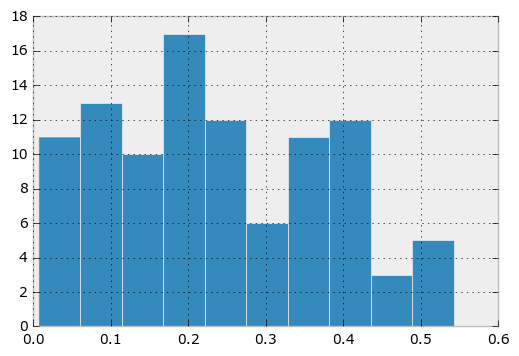

In [7]:
Y_p = lm_learn.evaluate_all(X)
Z = np.abs(Y1-Y_p)
Z.sort()
plt.hist(Z)

In [8]:
import sklearn.metrics as metrics
metrics.r2_score(Y1, Y_p)

0.91222822163910477

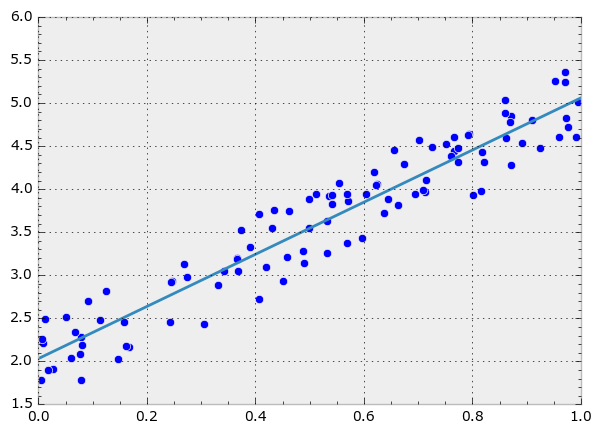

In [9]:
plt.figure(figsize=(7,5))
xs = np.linspace(0., 1., 100)
xs = xs.reshape((-1,1))
ys = lm_learn.evaluate_all(xs)
plt.scatter(X[:,0], Y1, s=36)
plt.plot(xs, ys)
plt.grid(1)
plt.minorticks_on()
plt.xlim(0,1)
plt.show()